# Importing Libraries

In [1]:
# import pandas for dataframe
import pandas as pd
# import numpy for transformations
import numpy as np
# visulization librarie
import matplotlib.pyplot as plt
import seaborn as sns
# import re for text cleaning
import re
# Settings the warnings to be ignored 
import warnings
warnings.filterwarnings('ignore')

# Data Analysis

## Data Overview

In [2]:
df1 = pd.read_csv('../data/udemy_online_education_courses_dataset.csv')  # Go one level up and access data.csv
df1.head()  # Display first five rows

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [3]:
# Make a copy of the dataset
df = df1.copy()

In [4]:
# Check Shape of the data
df.shape

(3678, 12)

In [5]:
# Check Columns of the data
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [6]:
df.info()  # Check for columns datatype and more about the size of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [7]:
# Check null values in data
df.isna().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

**Conclusion**

- In the data there are total 7 columns
- And there is no missing data 

In [8]:
# Summary statistics
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


In [9]:
# Check number of duplicates in data
df.duplicated().sum()

6

In [10]:
# remove duplicates from the data
df.drop_duplicates(inplace=True)

In [11]:
# Check number of duplicates in data
df.duplicated().sum()

0

In [12]:
# Convert 'published_timestamp' to datetime format
df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])

In [13]:
# Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3672 non-null   int64              
 1   course_title         3672 non-null   object             
 2   url                  3672 non-null   object             
 3   is_paid              3672 non-null   bool               
 4   price                3672 non-null   int64              
 5   num_subscribers      3672 non-null   int64              
 6   num_reviews          3672 non-null   int64              
 7   num_lectures         3672 non-null   int64              
 8   level                3672 non-null   object             
 9   content_duration     3672 non-null   float64            
 10  published_timestamp  3672 non-null   datetime64[ns, UTC]
 11  subject              3672 non-null   object             
dtypes: bool(1), datetime64[ns

In [14]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [15]:
df.select_dtypes('object').columns

Index(['course_title', 'url', 'level', 'subject'], dtype='object')

In [16]:
columns_lower_text = ['course_title', 'level', 'subject']

for col in columns_lower_text:
    df[col] = df[col].apply(lambda x: x.lower())

## Exploratory Data Analysis

### Univariate analysis

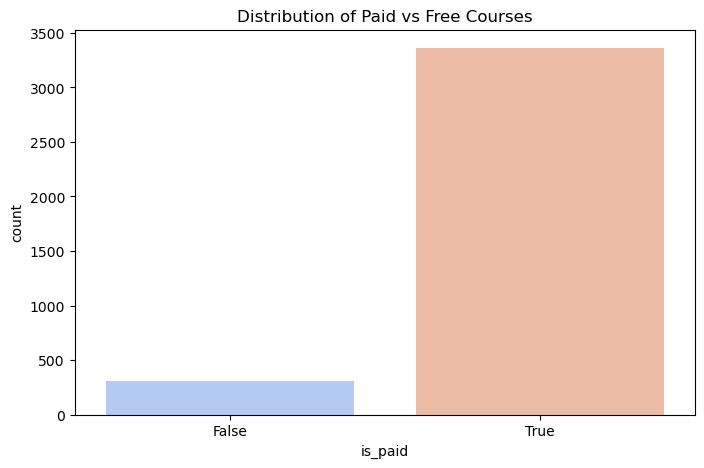

In [17]:
# Countplot for 'is_paid' column
plt.figure(figsize=(8, 5))
sns.countplot(x='is_paid', data=df, palette='coolwarm')
plt.title("Distribution of Paid vs Free Courses")
plt.show()

**CONCLUSION**

- There are imbalanced data distribution for is_paid column
- Too many values for Paid "True" and very less data for free courses

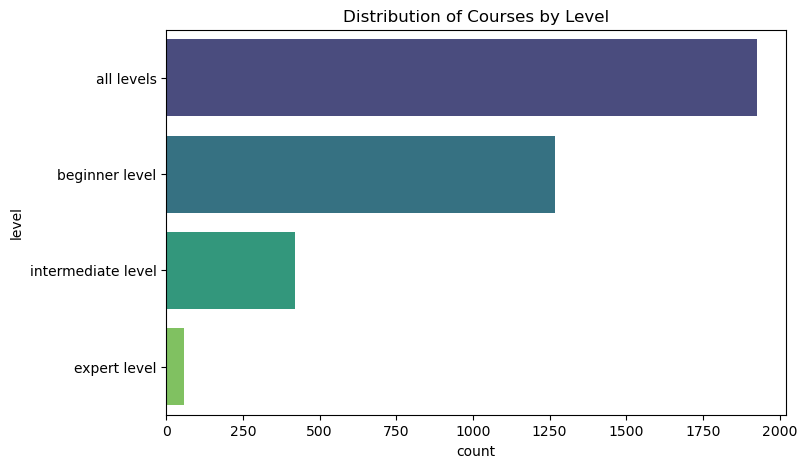

In [18]:
# Countplot for 'level'
plt.figure(figsize=(8, 5))
sns.countplot(y='level', data=df, order=df['level'].value_counts().index, palette='viridis')
plt.title("Distribution of Courses by Level")
plt.show()

**CONCLUSION**

- Most of the courses have all levels or beginner level

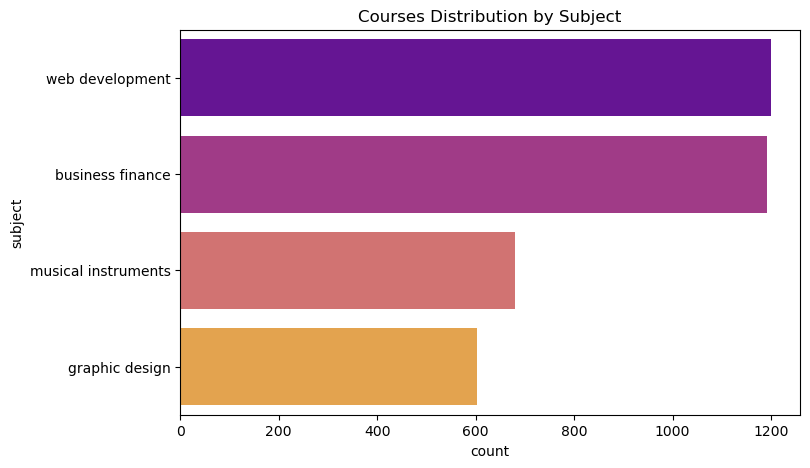

In [19]:
# Countplot for 'subject'
plt.figure(figsize=(8, 5))
sns.countplot(y='subject', data=df, order=df['subject'].value_counts().index, palette='plasma')
plt.title("Courses Distribution by Subject")
plt.show()

**CONCLUSION**

- Web Development and Business Finance have same number of courses - 1200

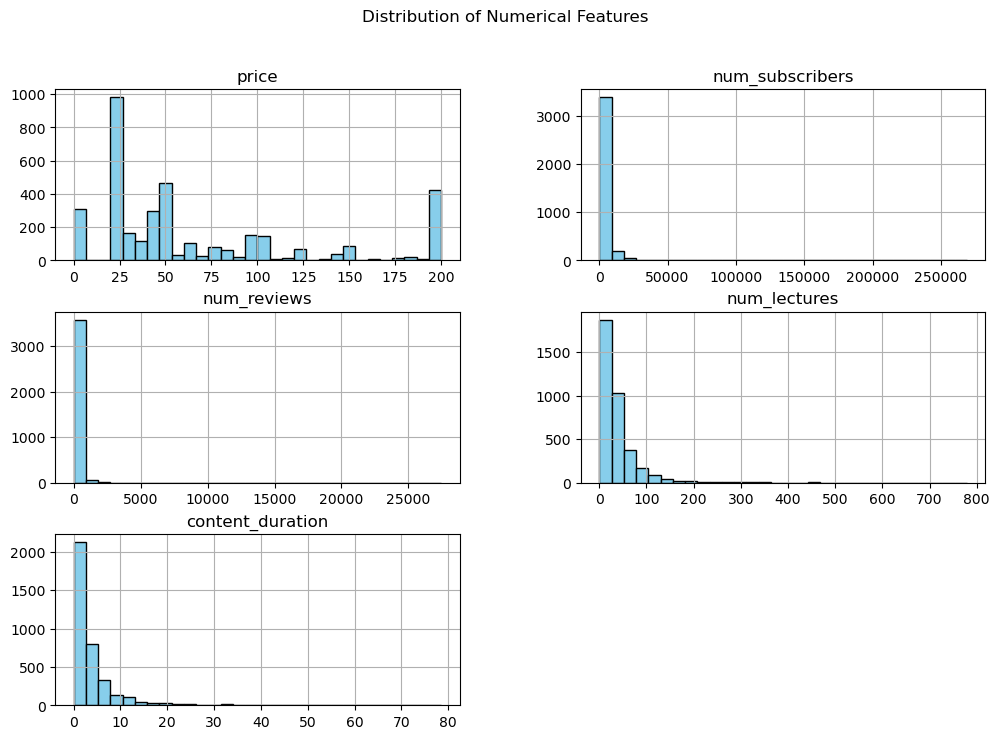

In [20]:
# Histograms
df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

**CONCLUSION**

- Price column have multimodel distribution
- Where all other numerical columns is highly right skewed data

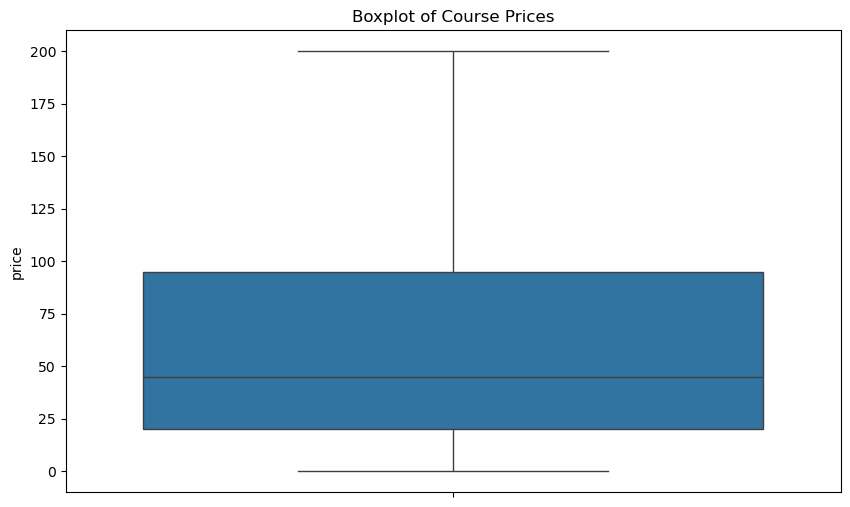

In [21]:
# Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title("Boxplot of Course Prices")
plt.show()

### Bivariate Analysis

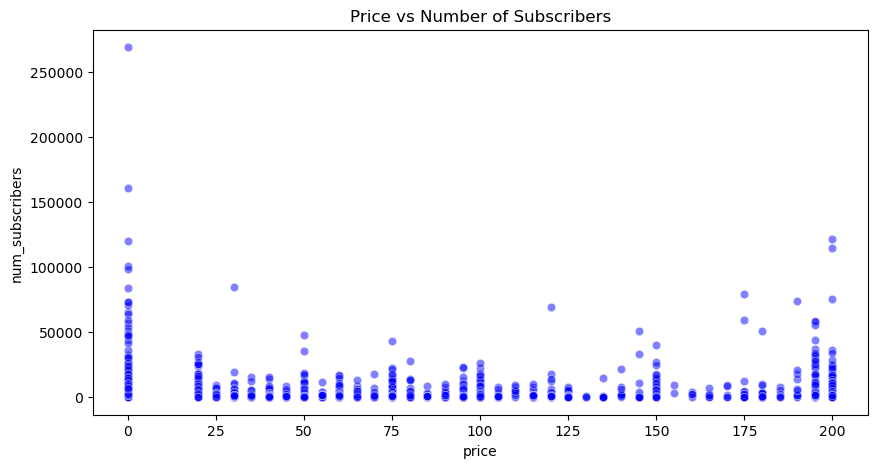

In [22]:
# Numerical vs Numerical
# Price vs Subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='num_subscribers', data=df, alpha=0.5, color='blue')
plt.title("Price vs Number of Subscribers")
plt.show()

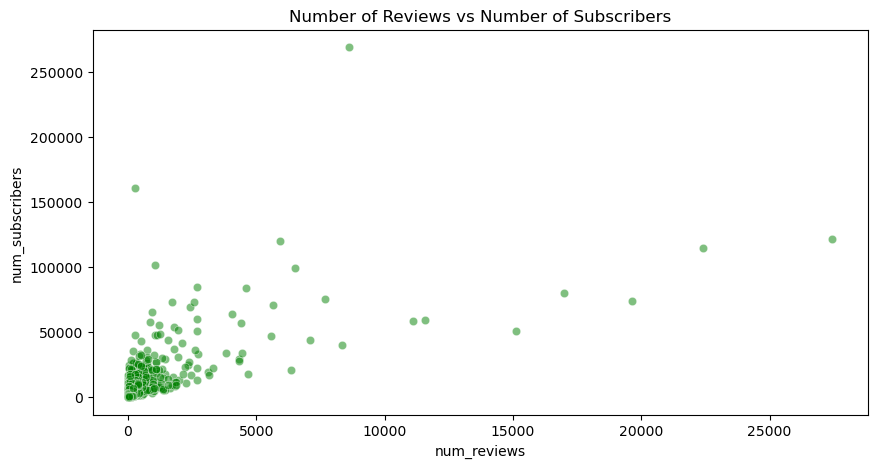

In [23]:
# Numerical vs Numerical
# Number of reviews vs Number of subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x='num_reviews', y='num_subscribers', data=df, alpha=0.5, color='green')
plt.title("Number of Reviews vs Number of Subscribers")
plt.show()

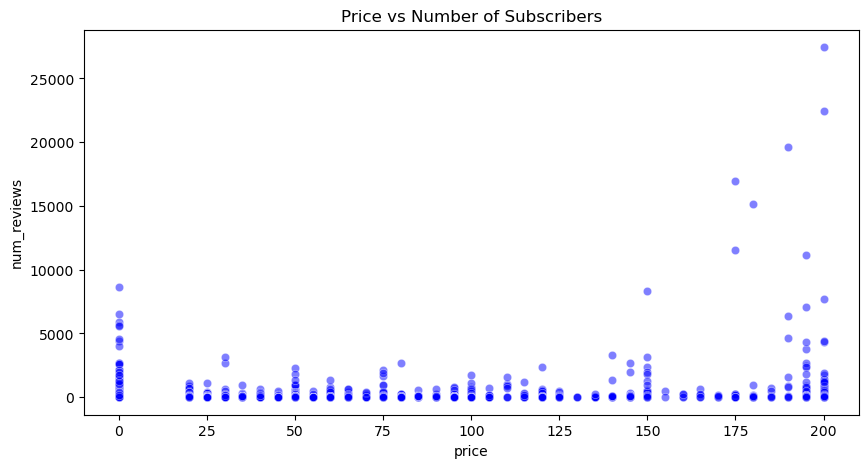

In [24]:
# Numerical vs Numerical
# Price vs Subscribers
plt.figure(figsize=(10, 5))
sns.scatterplot(x='price', y='num_reviews', data=df, alpha=0.5, color='blue')
plt.title("Price vs Number of Subscribers")
plt.show()

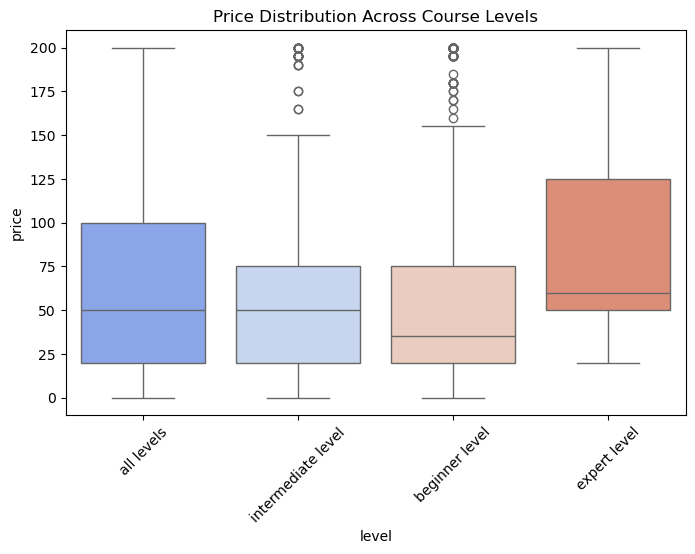

In [25]:
# Categorical vs Numerical
# Price vs Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='level', y='price', data=df, palette='coolwarm')
plt.title("Price Distribution Across Course Levels")
plt.xticks(rotation=45)
plt.show()

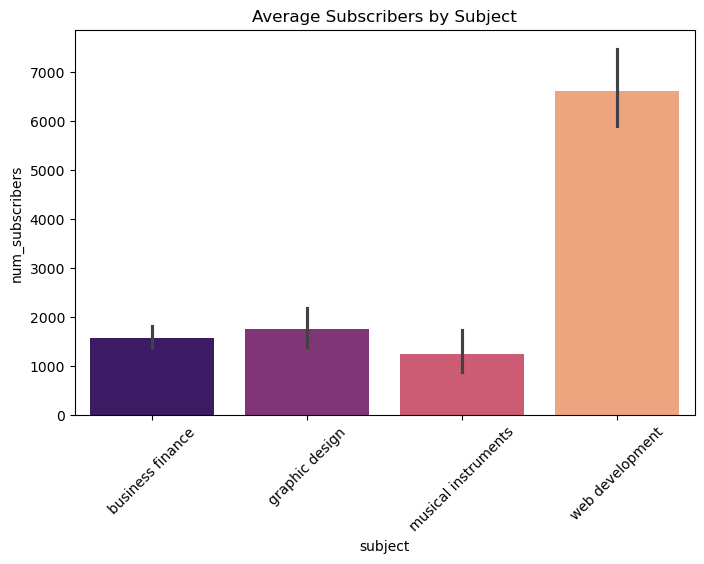

In [26]:
# Number of subscribers per subject
plt.figure(figsize=(8, 5))
sns.barplot(x='subject', y='num_subscribers', data=df, estimator=np.mean, palette='magma')
plt.title("Average Subscribers by Subject")
plt.xticks(rotation=45)
plt.show()

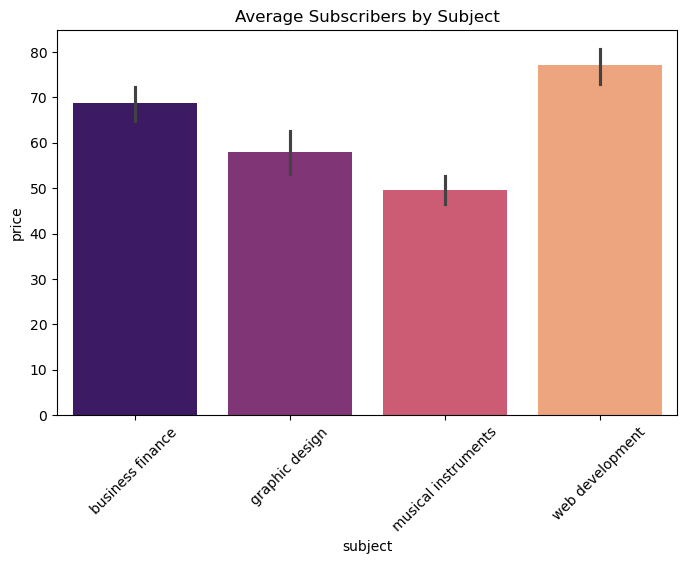

In [27]:
# Number of subscribers per subject
plt.figure(figsize=(8, 5))
sns.barplot(x='subject', y='price', data=df, estimator=np.mean, palette='magma')
plt.title("Average Subscribers by Subject")
plt.xticks(rotation=45)
plt.show()

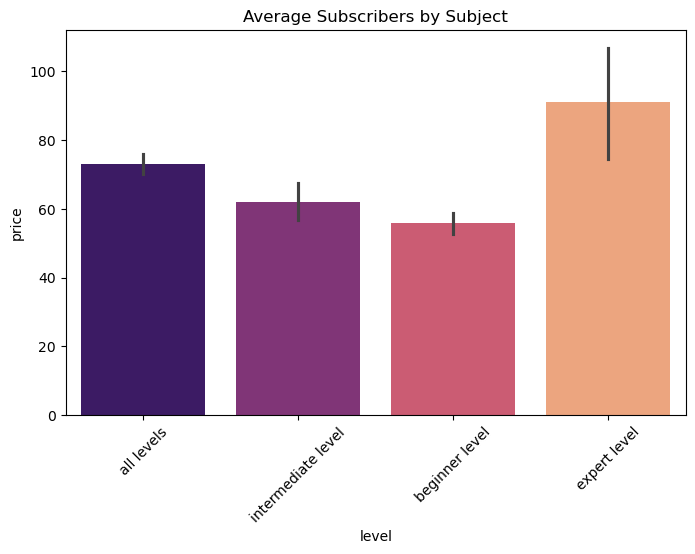

In [28]:
# Number of subscribers per subject
plt.figure(figsize=(8, 5))
sns.barplot(x='level', y='price', data=df, estimator=np.mean, palette='magma')
plt.title("Average Subscribers by Subject")
plt.xticks(rotation=45)
plt.show()

In [29]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

### Multivarite Analysis

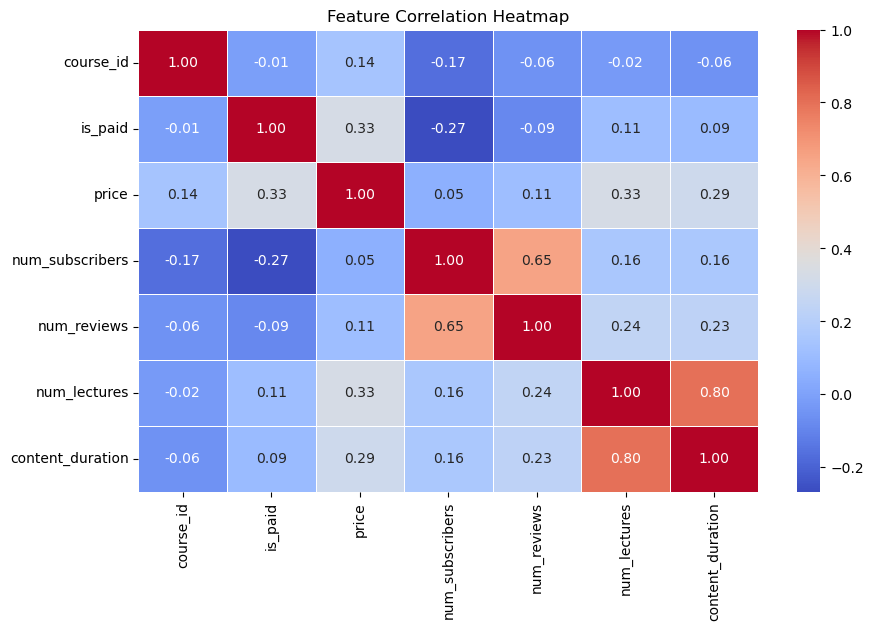

In [30]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True,), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

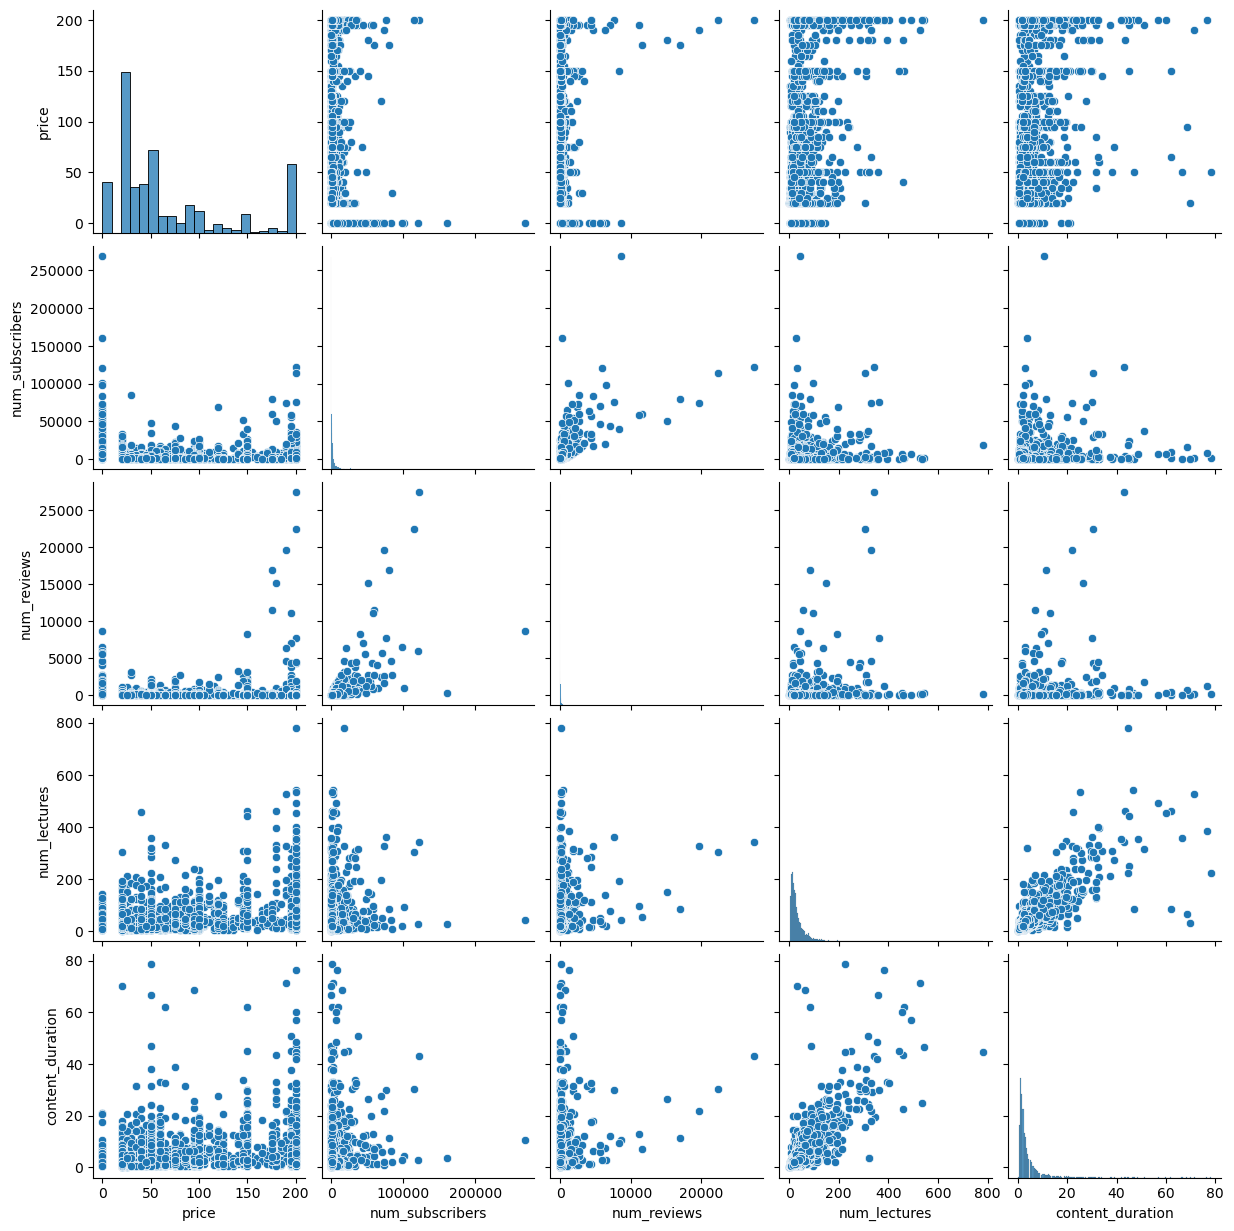

In [31]:
# Pairplot of numerical features
sns.pairplot(df[['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']])
plt.show()

In [32]:
# Grouping by Subject
subject_analysis = df.groupby('subject')['num_subscribers'].mean().sort_values(ascending=False)
print("Average Subscribers per Subject:\n", subject_analysis)

Average Subscribers per Subject:
 subject
web development        6619.922435
graphic design         1766.026578
business finance       1569.026868
musical instruments    1245.130882
Name: num_subscribers, dtype: float64


In [33]:
# Grouping by Level
level_analysis = df.groupby('level')['price'].mean().sort_values(ascending=False)
print("Average Course Price by Level:\n", level_analysis)

Average Course Price by Level:
 level
expert level          91.120690
all levels            73.090909
intermediate level    61.923990
beginner level        55.737382
Name: price, dtype: float64


In [34]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

Text(120.72222222222221, 0.5, 'Level')

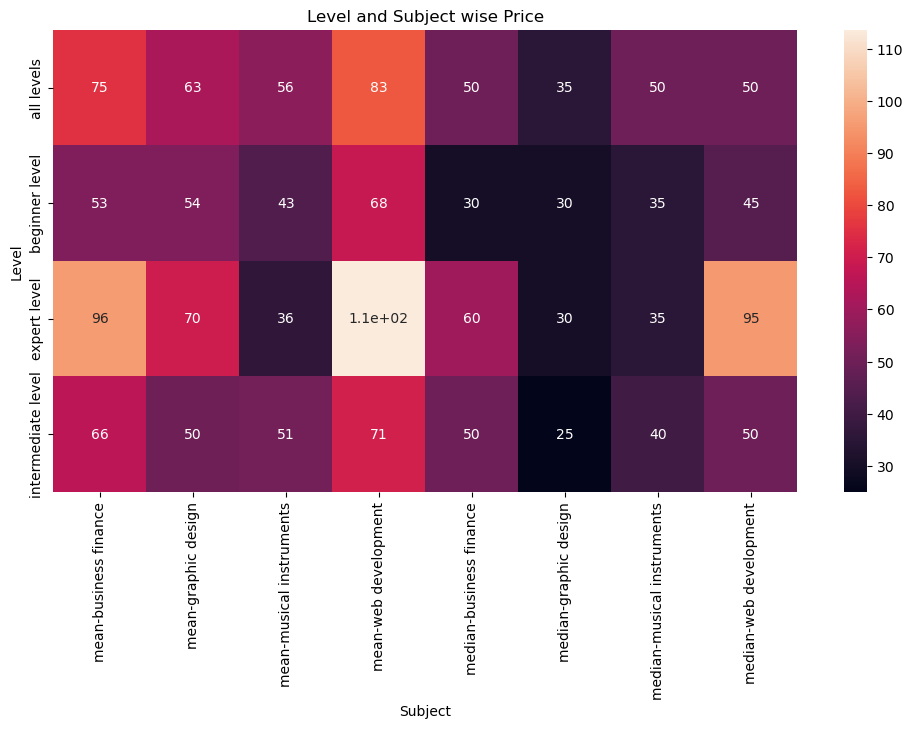

In [35]:
price_level_subject_wise_pt = pd.pivot_table(df, values='price',index='level', columns='subject',aggfunc=['mean','median'])

plt.figure(figsize=(12,6))
sns.heatmap(price_level_subject_wise_pt,annot=True)
plt.title("Level and Subject wise Price")
plt.xlabel("Subject")
plt.ylabel("Level")


# Recommendation System - Udemy

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from fuzzywuzzy import process  # For fuzzy matching


In [37]:
# Convert categorical text columns to lowercase for consistency
df['subject'] = df['subject'].str.lower()
df['level'] = df['level'].str.lower()
df['course_title'] = df['course_title'].str.lower()

In [38]:
# Select relevant features
df_filtered = df[['course_id', 'course_title', 'is_paid', 'num_subscribers', 'num_reviews', 'subject', 'level', 'content_duration', 'price']].copy()

In [39]:
### Step 1: Content-Based Filtering (CBF)
# TF-IDF for 'course_title'
tfidf = TfidfVectorizer()
title_tfidf = tfidf.fit_transform(df_filtered['course_title'])

# Normalize numerical features
scaler = StandardScaler()
df_filtered[['num_subscribers', 'num_reviews', 'content_duration', 'price']] = scaler.fit_transform(df_filtered[['num_subscribers', 'num_reviews', 'content_duration', 'price']])


In [40]:
# Create a feature matrix
feature_matrix = np.hstack((df_filtered[['is_paid', 'num_subscribers', 'num_reviews', 'content_duration', 'price']].values, title_tfidf.toarray()))


In [41]:
# Compute cosine similarity
content_similarity = cosine_similarity(feature_matrix)


In [42]:
### **Step 2: Collaborative Filtering (CF) using SVD**
# Prepare data for Surprise Library
reader = Reader(rating_scale=(0, df_filtered['num_subscribers'].max()))
data = Dataset.load_from_df(df_filtered[['course_id', 'num_subscribers', 'num_reviews']], reader)

# Train/Test split
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train SVD model
svd = SVD()
svd.fit(trainset)

# Make predictions on test set
predictions = svd.test(testset)
print("SVD Model RMSE:", accuracy.rmse(predictions))

RMSE: 0.6374
SVD Model RMSE: 0.6374345027859677


In [43]:
### **Find Similar Course Titles (Partial Match)**
def find_similar_course_title(user_input):
    # Direct substring match
    matching_courses = df_filtered[df_filtered['course_title'].str.contains(user_input.lower(), regex=True, na=False)]
    
    if not matching_courses.empty:
        return matching_courses.iloc[0]['course_title']
    
    # If no exact match, use fuzzy matching
    closest_match, score = process.extractOne(user_input, df_filtered['course_title'])
    
    if score > 60:  # Acceptable similarity threshold
        return closest_match
    
    return None  # No similar course found

In [44]:
### **Content-Based Filtering Using Partial Matching**
def content_based_filtering(course_title, top_n=5):
    matched_course_title = find_similar_course_title(course_title)
    
    if not matched_course_title:
        print(f"Warning: No similar course found for '{course_title}'.")
        return []

    course_idx = df_filtered[df_filtered['course_title'] == matched_course_title].index[0]
    similarity_scores = list(enumerate(content_similarity[course_idx]))
    sorted_courses = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    return [df.iloc[i[0]]['course_title'] for i in sorted_courses]

In [45]:
### **Step 3: Hybrid Recommendation (CBF + CF)**
def hybrid_recommendation(subject=None, level=None, course_title=None, top_n=5):
    if course_title and not subject and not level:
        # Only `course_title` given → Return Content-Based Filtering results
        return content_based_filtering(course_title, top_n=top_n)

    elif subject and level and not course_title:
        # Only `subject` and `level` given → Return Collaborative Filtering results
        cf_courses = df_filtered[
            df_filtered['subject'].str.contains(subject, case=False, na=False) &
            df_filtered['level'].str.contains(level, case=False, na=False)
        ]
        
        # Sort by number of subscribers and return top N
        cf_courses_index = cf_courses.sort_values(by='num_subscribers', ascending=False).head(top_n).index
        
        # Return relevant columns
        return df.loc[cf_courses_index,['course_id', 'course_title', 'subject', 'level', 'num_subscribers', 'price', 'url']]

    elif subject and level and course_title:
        # All three are given → Return Hybrid Recommendations
        cbf_courses = content_based_filtering(course_title, top_n=top_n)

        # Ensure `cbf_courses` is a DataFrame
        if isinstance(cbf_courses, list):
            cbf_courses = df_filtered[df_filtered['course_title'].isin(cbf_courses)]

        # Collaborative filtering recommendations
        cf_courses = df_filtered[(df_filtered['subject'] == subject.lower()) & 
                                 (df_filtered['level'] == level.lower())]
        cf_courses = cf_courses.sort_values(by='num_subscribers', ascending=False).head(top_n)

        # Combine both approaches
        hybrid_recommendations_index = pd.concat([cbf_courses, cf_courses], ignore_index=True).drop_duplicates().head(top_n).index
        return df.loc[hybrid_recommendations_index,['course_id', 'course_title', 'subject', 'level', 'num_subscribers', 'price', 'url']]

    else:
        return "Error: Please provide at least a `course_title` or (`subject` and `level`)."



In [46]:
### **Example User Input**
subject_input = "business finance"
level_input = "beginner"
course_title_input = "investment strategies"  # No need for exact match!

# **Get Hybrid Recommendations**
recommendations = hybrid_recommendation(subject_input, level_input, course_title_input,top_n=5)

recommendations

,course_id,course_title,subject,level,num_subscribers,price,url
0,1070968,ultimate investment banking course,business finance,all levels,2147,200,https://www.udemy.com/ultimate-investment-bank...
1,1113822,complete gst course & certification - grow you...,business finance,all levels,2792,75,https://www.udemy.com/goods-and-services-tax/
2,1006314,financial modeling for business analysts and c...,business finance,intermediate level,2174,45,https://www.udemy.com/financial-modeling-for-b...
3,1210588,beginner to pro - financial analysis in excel ...,business finance,all levels,2451,95,https://www.udemy.com/complete-excel-finance-c...
4,1011058,how to maximize your profits trading options,business finance,intermediate level,1276,200,https://www.udemy.com/how-to-maximize-your-pro...


## Exporting dataset

In [47]:
df.to_csv("../data/udemy_cleaned.csv")